<a href="https://colab.research.google.com/github/pratikiiitv/cs302/blob/main/universal_approx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_train = np.random.rand(1000)*2*3.14 
y_train = 1+np.sin(x_train)

In [3]:
x_train = x_train.reshape(len(x_train),1)
y_train = y_train.reshape(len(y_train),1)

In [4]:
model = Sequential()
model.add(Dense(2, input_dim=1, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(4, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(8, activation='tanh', kernel_initializer='he_uniform'))
model.add(Dense(16, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(8, activation='tanh', kernel_initializer='he_uniform'))
model.add(Dense(4, activation='tanh', kernel_initializer='he_uniform'))
model.add(Dense(2, activation='tanh', kernel_initializer='he_uniform'))
model.add(Dense(1))

In [5]:
#opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='mse', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 4         
                                                                 
 dense_1 (Dense)             (None, 4)                 12        
                                                                 
 dense_2 (Dense)             (None, 8)                 40        
                                                                 
 dense_3 (Dense)             (None, 16)                144       
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 4)                 36        
                                                                 
 dense_6 (Dense)             (None, 2)                 1

In [6]:
model.fit(x_train, y_train, epochs=50, batch_size=256, validation_split=0.2, verbose=1)

Epoch 1/50
4/4 [==============================] - 1s 62ms/step - loss: 2.4791 - val_loss: 2.3760
Epoch 2/50
4/4 [==============================] - 0s 10ms/step - loss: 2.3120 - val_loss: 2.2015
Epoch 3/50
4/4 [==============================] - 0s 9ms/step - loss: 2.1383 - val_loss: 2.0055
Epoch 4/50
4/4 [==============================] - 0s 10ms/step - loss: 1.9393 - val_loss: 1.7753
Epoch 5/50
4/4 [==============================] - 0s 12ms/step - loss: 1.6985 - val_loss: 1.5095
Epoch 6/50
4/4 [==============================] - 0s 10ms/step - loss: 1.4283 - val_loss: 1.2360
Epoch 7/50
4/4 [==============================] - 0s 9ms/step - loss: 1.1696 - val_loss: 1.0108
Epoch 8/50
4/4 [==============================] - 0s 9ms/step - loss: 0.9682 - val_loss: 0.8625
Epoch 9/50
4/4 [==============================] - 0s 10ms/step - loss: 0.8442 - val_loss: 0.7743
Epoch 10/50
4/4 [==============================] - 0s 9ms/step - loss: 0.7723 - val_loss: 0.7223
Epoch 11/50
4/4 [================

In [7]:
yhat = model.predict(x_train)

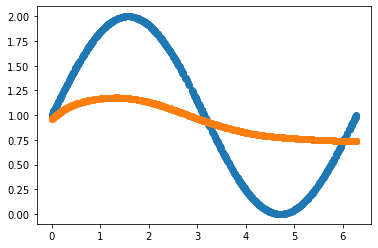

In [8]:
plt.scatter(x_train, y_train,  label='Actual')
plt.scatter(x_train, yhat, label='Predicted')

In [9]:
x = list(x_train)

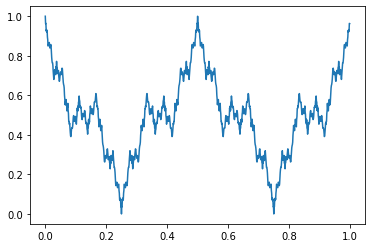

In [10]:
# Weiestrass continuous everywhere and differentiable nowhere function
# Credit: This function is implemented by Maria Efimova (found at "https://medium.com/@Melearning/weierstrass-function-in-python-6b1e6819df3a") 

Var = 1000
start=0
stop=1
x_train_weis = np.arange(start,stop,((stop-start)/Var))

a=1/2
b=3
def weierstrass(x,Ncoff):
    we=np.zeros(Var)
    for n in range(0,Ncoff):
        we=we+np.cos(b**n*np.pi*(4*x-2))*(a**n)
    return we

Ncoff=500
y_train_weis=(weierstrass(x_train_weis, Ncoff)+2)/4
plt.plot(x_train_weis,y_train_weis)
plt.show()


In [11]:
model_weis = Sequential()
model_weis.add(Dense(16, input_dim=1, activation='relu', kernel_initializer='he_uniform'))
model_weis.add(Dense(8, activation='relu', kernel_initializer='he_uniform'))
model_weis.add(Dense(4, activation='relu', kernel_initializer='he_uniform'))
model_weis.add(Dense(2, activation='sigmoid', kernel_initializer='he_uniform'))
model_weis.add(Dense(1))

In [12]:
model_weis.compile(loss='mse', optimizer='adam')
model_weis.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 16)                32        
                                                                 
 dense_9 (Dense)             (None, 8)                 136       
                                                                 
 dense_10 (Dense)            (None, 4)                 36        
                                                                 
 dense_11 (Dense)            (None, 2)                 10        
                                                                 
 dense_12 (Dense)            (None, 1)                 3         
                                                                 
Total params: 217
Trainable params: 217
Non-trainable params: 0
_________________________________________________________________


In [13]:
model_weis.fit(x_train_weis, y_train_weis, epochs=10000, batch_size=100, verbose=0)

In [14]:
yhat_weis = model_weis.predict(x_train_weis)

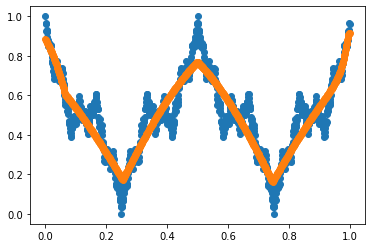

In [15]:
plt.scatter(x_train_weis, y_train_weis,  label='Actual')
plt.scatter(x_train_weis,yhat_weis, label='Predicted')

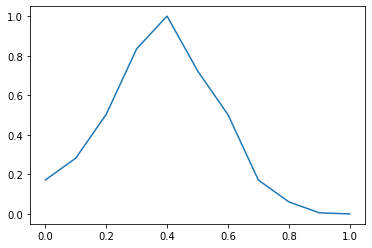

In [16]:
# Piece wice linear function
x_train_pl = np.linspace(0, 1, 1000)

y=[]
for i in x_train_pl:
    if i<0.1:
        y.append(2*i)
    elif i>0.1 and i<=0.2:
        y.append(4*(i-0.1)+0.2)
    elif i>0.2 and i<=0.3:
        y.append(6*(i-0.2)+0.6)
    elif i>0.3 and i<=0.4:
        y.append(3*(i-0.3)+1.2)
    elif i>0.4 and i<=0.5:
        y.append(-5*(i-0.4)+1.5)
    elif i>0.5 and i<=0.6:
        y.append(-4*(i-0.5)+1.0)
    elif i>0.6 and i<=0.7:
        y.append(-6*(i-0.6)+0.6)
    elif i>0.7 and i<=0.8:
        y.append(-2*(i-0.7))
    elif i>0.8 and i<=0.9:
        y.append(-1*(i-0.8)-0.2)
    else:
        y.append(-0.1*(i-0.9)-0.3)

y_train_pl=(y-np.min(y))/(np.max(y)-np.min(y))
plt.plot(x_train_pl,np.array(y_train_pl))
plt.show()


In [17]:
model_pl = Sequential()
model_pl.add(Dense(16, input_dim=1, activation='relu', kernel_initializer='he_uniform'))
model_pl.add(Dense(8, activation='relu', kernel_initializer='he_uniform'))
model_pl.add(Dense(4, activation='relu', kernel_initializer='he_uniform'))
model_pl.add(Dense(2, activation='sigmoid', kernel_initializer='he_uniform'))
model_pl.add(Dense(1))

In [18]:
model_pl.compile(loss='mse', optimizer='adam')
model_pl.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 16)                32        
                                                                 
 dense_14 (Dense)            (None, 8)                 136       
                                                                 
 dense_15 (Dense)            (None, 4)                 36        
                                                                 
 dense_16 (Dense)            (None, 2)                 10        
                                                                 
 dense_17 (Dense)            (None, 1)                 3         
                                                                 
Total params: 217
Trainable params: 217
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_pl.fit(x_train_pl, y_train_pl, epochs=1000, batch_size=100, verbose=0)

In [ ]:
yhat_pl = model_pl.predict(x_train_pl)

In [ ]:
plt.scatter(x_train_pl, y_train_pl,  label='Actual')
plt.scatter(x_train_weis,yhat_pl, label='Predicted',alpha=0.05)

In [ ]:
# Classification function

x=  np.random.rand(1000)
x_train_cls =(x-np.min(x))/(np.max(x)-np.min(x))
y=[]
for i in x_train_cls:
    if i<0.1:
        y.append([1,0,0])
    elif i>0.1 and i<=0.2:
        y.append([0,1,0])
    elif i>0.2 and i<=0.3:
        y.append([0,0,1])
    elif i>0.3 and i<=0.4:
        y.append([0,1,0])
    elif i>0.4 and i<=0.5:
        y.append([0,0,1])
    elif i>0.5 and i<=0.6:
        y.append([1,0,0])
    elif i>0.6 and i<=0.7:
        y.append([1,0,0])
    elif i>0.7 and i<=0.8:
        y.append([0,0,1])
    elif i>0.8 and i<=0.9:
        y.append([0,1,0])
    else:
        y.append([1,0,0])
y_train_cls=np.array(y)


In [ ]:
model_cls = Sequential()
model_cls.add(Dense(16, input_dim=1, activation='relu'))
model_cls.add(Dense(12, activation='relu'))
model_cls.add(Dense(8, activation='relu'))
model_cls.add(Dense(6, activation='sigmoid'))
model_cls.add(Dense(3, activation='sigmoid'))

In [ ]:
model_cls.compile(loss='mse', optimizer='adam')
model_cls.summary()

In [ ]:
model_cls.fit(x_train_cls, y_train_cls, epochs=10000, batch_size=100, verbose=0)

In [ ]:
yhat_cls = model_cls.predict(x_train_cls)

In [ ]:
cls1=x_train_cls[y_train_cls[:,0]==1]
plt.scatter(cls1,np.zeros_like(cls1) + 0.98,color='r',  label='Actual')
cls2=x_train_cls[y_train_cls[:,1]==1]
plt.scatter(cls2,np.zeros_like(cls2) + 0.98,color='g',  label='Actual')
cls3=x_train_cls[y_train_cls[:,2]==1]
plt.scatter(cls3,np.zeros_like(cls3) + 0.98,color='b',  label='Actual')

cls=[[]]*3
for i,yi in enumerate(yhat_cls):
  idx=np.argmax(yi)
  cls[idx]=cls[idx]+[x_train_cls[i]]
cls=np.array(cls)
plt.scatter(cls[0],np.zeros_like(cls[0]) + 1.02,color='r',  label='predicted')
plt.scatter(cls[1],np.zeros_like(cls[1]) + 1.02,color='g',  label='predicted')
plt.scatter(cls[2],np.zeros_like(cls[2]) + 1.02,color='b',  label='predicted')
plt.ylim(0.95,1.05)
plt.show()


In [ ]:
model_pl2 = Sequential()
model_pl2.add(Dense(16, input_dim=1, activation='relu', kernel_initializer='he_uniform'))
model_pl2.add(Dense(8, activation='relu', kernel_initializer='he_uniform'))
model_pl2.add(Dense(4, activation='relu', kernel_initializer='he_uniform'))
model_pl2.add(Dense(2, activation='sigmoid', kernel_initializer='he_uniform'))
model_pl2.add(Dense(1))



num_of_exp=500
Err=np.zeros(num_of_exp)
for tr in range(num_of_exp):
    print(tr)
    x_train_pl2 = np.random.rand(1000)
    y=[]
    for i in x_train_pl2:
        if i<0.1:
            y.append(2*i)
        elif i>0.1 and i<=0.2:
            y.append(4*(i-0.1)+0.2)
        elif i>0.2 and i<=0.3:
            y.append(6*(i-0.2)+0.6)
        elif i>0.3 and i<=0.4:
            y.append(3*(i-0.3)+1.2)
        elif i>0.4 and i<=0.5:
            y.append(-5*(i-0.4)+1.5)
        elif i>0.5 and i<=0.6:
            y.append(-4*(i-0.5)+1.0)
        elif i>0.6 and i<=0.7:
            y.append(-6*(i-0.6)+0.6)
        elif i>0.7 and i<=0.8:
            y.append(-2*(i-0.7))
        elif i>0.8 and i<=0.9:
            y.append(-1*(i-0.8)-0.2)
        else:
            y.append(-0.1*(i-0.9)-0.3)

    y_train_pl2=(y-np.min(y))/(np.max(y)-np.min(y))
    model_pl2.compile(loss='mse', optimizer='adam')
    model_pl2.fit(x_train_pl2, y_train_pl2, epochs=100, batch_size=100, verbose=0)
    Err[tr]=model_pl2.evaluate(x_train_pl2,  y_train_pl2)

plt.hist(Err)
plt.show()

In [ ]:
plt.hist(Err)
plt.show()